In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

import nibabel as nb 
from nilearn import image as nli
from nilearn import plotting as nl_plotting

## 1 - Ouverture d'une session

In [2]:
nlimg = nli.load_img("MD5E-s157271840--b933438350a83069177ba5e128969bf8.nii.gz")

In [3]:
nlimg.slicer[...,:].shape

(106, 106, 69, 194)

In [4]:
avg_img = nli.mean_img(nlimg)

In [5]:
TR = nlimg.header["pixdim"][4]

In [6]:
func_d = nli.clean_img(nlimg, detrend=True, standardize=False, t_r=TR, low_pass=0.01)

## 2 - Composantes

In [7]:
from nilearn.decomposition import DictLearning

In [8]:
# Get the functional MRI data
func_filenames = ["MD5E-s157271840--b933438350a83069177ba5e128969bf8.nii.gz"]

In [9]:
# Initialize DictLearning object
dict_learn = DictLearning(
    n_components=3,
    smoothing_fwhm=6.0,
    memory="nilearn_cache",
    memory_level=2,
    random_state=0,
    standardize="zscore_sample",
)

In [10]:
# Fit to the data
dict_learn.fit(nlimg)

DictLearning(memory=Memory(location=nilearn_cache\joblib), memory_level=2,
             n_components=3, random_state=0, smoothing_fwhm=6.0,
             standardize='zscore_sample')

In [14]:
# Resting state networks/maps in attribute `components_img_`
components_img = dict_learn.components_img_

c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


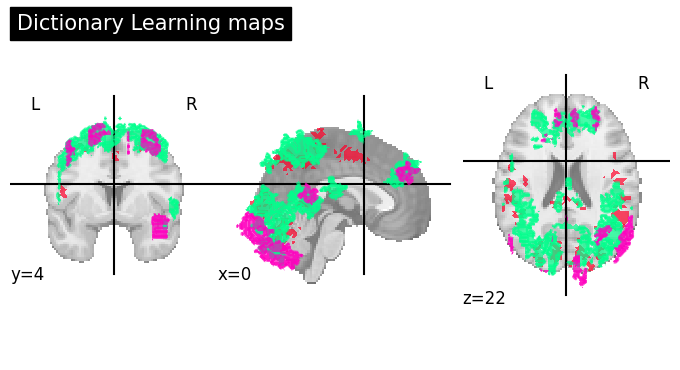

In [15]:
nl_plotting.plot_prob_atlas(
    components_img,
    view_type="filled_contours",
    title="Dictionary Learning maps",
)

Les composantes ne sont pas nécessairement disjointes. Les régions le sont.

## 3 - Régions

In [16]:
from nilearn.regions import RegionExtractor

In [17]:
extractor = RegionExtractor(
    components_img,
    threshold=0.5,
    thresholding_strategy="ratio_n_voxels",
    extractor="local_regions",
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    min_region_size=1350,
)

In [18]:
# Just call fit() to process for regions extraction
extractor.fit()

RegionExtractor(maps_img=<nibabel.nifti1.Nifti1Image object at 0x00000215A4A49DB0>,
                standardize='zscore_sample',
                standardize_confounds='zscore_sample', threshold=0.5)

In [19]:
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\users\m

c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\users\mathis\appdata\loca

c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\users\m

c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\users\mathis\appdata\loca

c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\users\m

c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\matplotlib\contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
c:\users\mathis\appdata\local\programs\python\python310\lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


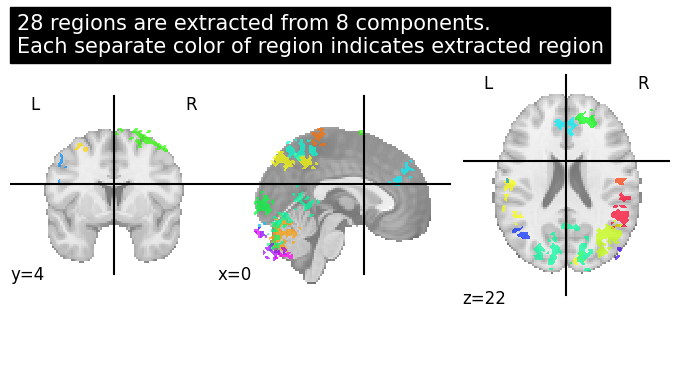

In [20]:
title = (
    "%d regions are extracted from %d components."
    "\nEach separate color of region indicates extracted region"
    % (n_regions_extracted, 8)
)
nl_plotting.plot_prob_atlas(
    regions_extracted_img, view_type="filled_contours", title=title
)


On peut définir l'activation d'un sommet de notre futur graphe par la somme de l'activité des voxels de la région qu'il représente

In [35]:
regions_extracted_img.get_fdata()[...,:].sum()

184.55800193241902

## 4 - Connectivité

In [22]:
from nilearn.connectome import ConnectivityMeasure

In [23]:
# Initializing ConnectivityMeasure object with kind='correlation'
connectome_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)

In [24]:
# call transform from RegionExtractor object to extract timeseries signals
timeseries_each_subject = extractor.transform(func_filenames[0]) #, confounds=confound)
# call fit_transform from ConnectivityMeasure object
correlation = connectome_measure.fit_transform([timeseries_each_subject])

In [25]:
# Mean of all correlations
mean_correlations = np.mean(correlation, axis=0).reshape(
    n_regions_extracted, n_regions_extracted
)

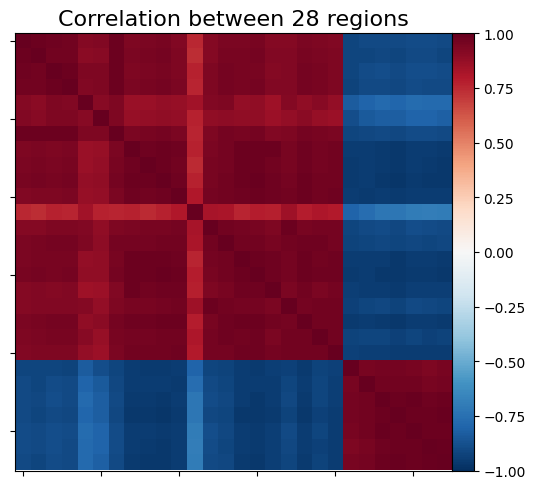

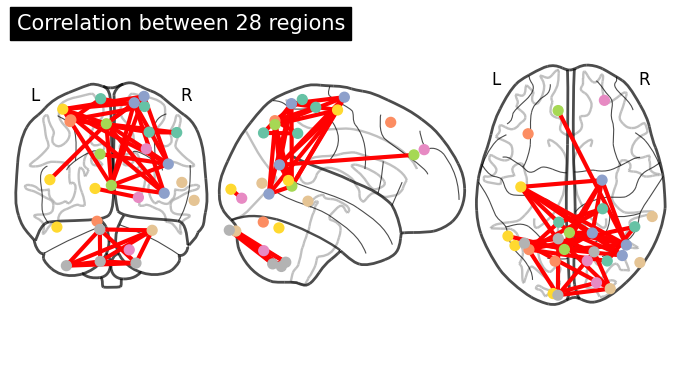

In [26]:
title = f"Correlation between {int(n_regions_extracted)} regions"

# First plot the matrix
display = nl_plotting.plot_matrix(
    mean_correlations, vmax=1, vmin=-1, colorbar=True, title=title
)

# Then find the center of the regions and plot a connectome
regions_img = regions_extracted_img
coords_connectome = nl_plotting.find_probabilistic_atlas_cut_coords(regions_img)

nl_plotting.plot_connectome(
    mean_correlations, coords_connectome, edge_threshold="90%", title=title
)


## 5 - Construction du graphe associé

In [33]:
from pygsp import graphs

In [27]:
mean_correlations

array([[ 1.        ,  0.98069805,  0.9697339 ,  0.9676111 ,  0.9153225 ,
         0.92389864,  0.9817108 ,  0.93352866,  0.94478995,  0.9501627 ,
         0.92724663,  0.75175834,  0.91608834,  0.9401084 ,  0.9429684 ,
         0.95170254,  0.91549563,  0.9216156 ,  0.9446716 ,  0.93212205,
         0.92595494, -0.91828126, -0.9024973 , -0.90086305, -0.9046732 ,
        -0.89317673, -0.8922693 , -0.9032923 ],
       [ 0.98069805,  1.        ,  0.9642299 ,  0.9630058 ,  0.9030432 ,
         0.91259444,  0.97794586,  0.9390132 ,  0.9499211 ,  0.9534998 ,
         0.93684745,  0.73862064,  0.921703  ,  0.9484883 ,  0.9511908 ,
         0.9557091 ,  0.9258298 ,  0.9242638 ,  0.9519448 ,  0.9377812 ,
         0.9321204 , -0.9176279 , -0.91556567, -0.9095187 , -0.9145829 ,
        -0.90511155, -0.90621555, -0.91413385],
       [ 0.9697339 ,  0.9642299 ,  1.        ,  0.98373127,  0.9366102 ,
         0.9320191 ,  0.97904557,  0.93601394,  0.94245625,  0.95123595,
         0.9362072 ,  0.7704

In [28]:
# Calculate the 90th percentile of absolute values
threshold = np.percentile(np.abs(mean_correlations), 80)

# Replace values below the threshold with zeros
result_matrix = np.where(np.abs(mean_correlations) > threshold, mean_correlations, 0)

In [29]:
result_matrix

array([[ 1.        ,  0.98069805,  0.9697339 ,  0.9676111 ,  0.        ,
         0.        ,  0.9817108 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.98069805,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.97794586,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.9697339 ,  0.        ,  1.        ,  0.98373127,  0.        ,
         0.        ,  0.97904557,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

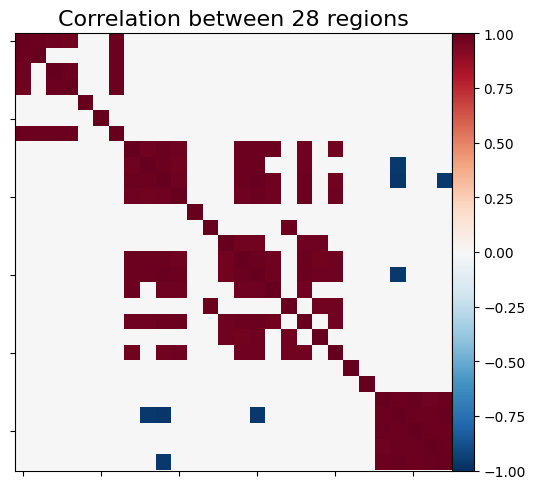

In [30]:
display = nl_plotting.plot_matrix(
    result_matrix, vmax=1, vmin=-1, colorbar=True, title=title
)

In [31]:
A = (result_matrix != 0).astype(int)

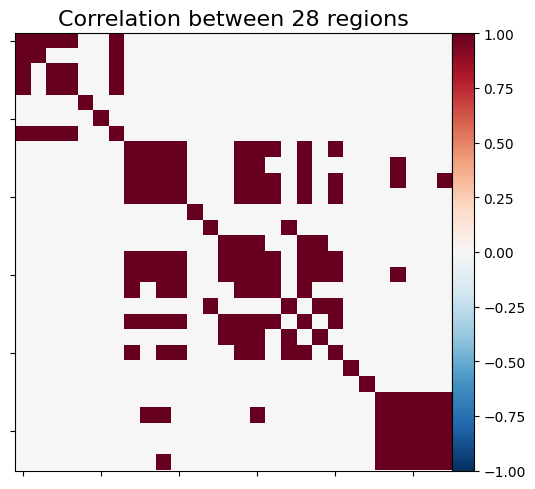

In [32]:
display = nl_plotting.plot_matrix(
    A, vmax=1, vmin=-1, colorbar=True, title=title
)

In [37]:
np.fill_diagonal(A, 0)
G = graphs.Graph(A)

## 6 - Graph Signal Processing

In [38]:
from pygsp import filters, plotting

### 6.1 - Fourier

On choisit une représentation du graph

In [39]:
G.set_coordinates('ring2D')

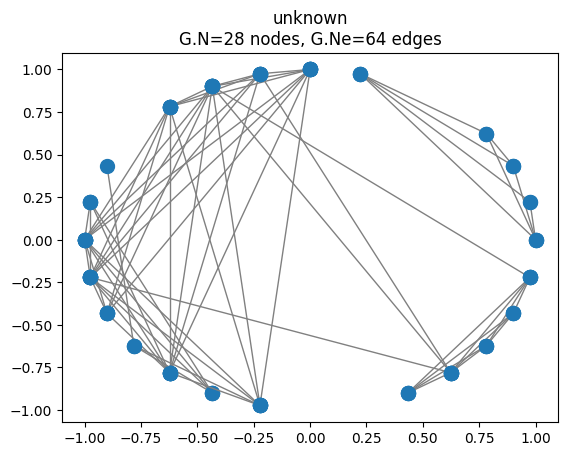

In [40]:
G.plot()

On calcul explicitement la base de Fourier (au lieu de le faire implicitement plusieurs fois par la suite)

In [41]:
G.compute_fourier_basis()

On représente des vecteurs propres de la base de Fourier comme des signaux sur le graphe

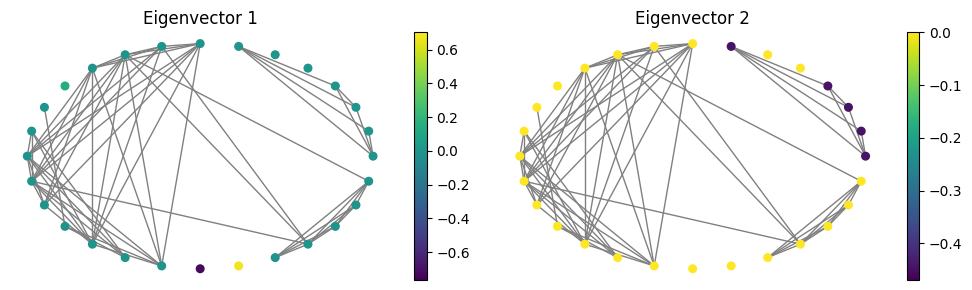

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for i, ax in enumerate(axes):
    G.plot_signal(G.U[:, i+1], vertex_size=30, ax=ax)
    ax.set_title('Eigenvector {}'.format(i+1))
    ax.set_axis_off()
fig.tight_layout()

### 6.2 - Filtering

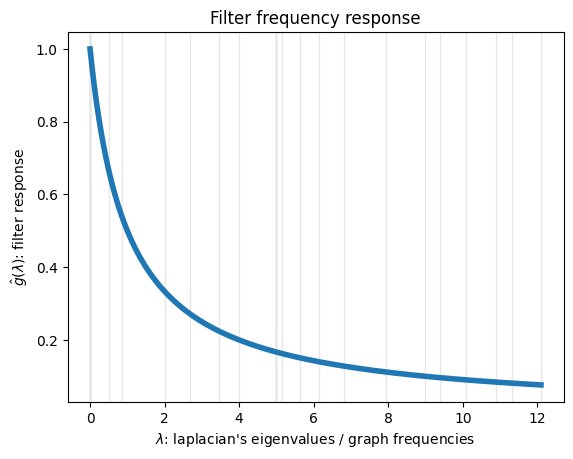

In [97]:
tau = 1
def g(x):
    return 1. / (1. + tau * x)
g = filters.Filter(G, g)

fig, ax = plt.subplots()
g.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('Filter frequency response')

On définit un fonction de transfert

In [105]:
def g(x):
    return 1. / (1. + tau * x)

On définit la fonction de filtrage, celle qui permet de calculer $Y_{\Psi_{Al}}$ de la partie 4 du papier.

In [106]:
def filtration (G, g, X) :
    G.compute_fourier_basis()
    return G.U @ g(np.diag(G.e)) @ G.U.T @ X

Test qui n'a pas de sens particulier : on filtre le signal associée au deuxième vecteur propre de la base de Fourier

In [107]:
filtration (G, g, G.U[:,1])

array([ 0.40671099,  0.45698229, -1.47486936, -0.0606558 ,  1.        ,
        1.        , -1.56423611,  0.08127737, -1.22759106, -1.70548302,
        1.49549093,  1.06163663, -1.94914379, -1.35471102, -0.26547278,
        0.62197669, -0.08495071,  0.11541073,  0.73796475,  0.8412321 ,
       -0.35205536, -1.28779308, -0.18266194,  0.85544556, -1.39551169,
        0.33780747, -1.07640609, -0.28621519])

Pour calculer la concentration :
- On regarde T graphes du cerveau d'un patient (pendant qu'il switch de task)
- On filtre les T graphs signals (T calculs de $Y_{\Psi_{Al}}$)
- On calcule la norme de chaque $Y_{\Psi_{Al}}$ (norme 2)
- On calcule la moyenne des T normes calculées